In [2]:
# https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy
import json
f = open("/Users/sanketmokashi/projects/pakama/RepTracker/data/input.json", "r")
js = json.load(f)
# js["data"].reverse()
print(js["data"])
print(js["time"])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 9.0, 10.0, 12.0, 14.0, 16.0, 17.0, 19.0, 21.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 25.0, 24.0, 24.0, 23.0, 22.0, 21.0, 20.0, 18.0, 17.0, 16.0, 15.0, 14.0, 14.0, 13.0, 12.0, 12.0, 11.0, 11.0, 11.0, 10.0, 10.0, 11.0, 11.0, 11.0, 12.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 22.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 14.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 22.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 11.0, 12.0, 12.0, 14.

pydev debugger: Unable to find real location for: /var/folders/fh/nqrs0_8961jb_37n8tp438x00000gn/T/ipykernel_62905/3651153170.py
pydev debugger: Unable to find real location for: <frozen importlib._bootstrap_external>
pydev debugger: Unable to find real location for: <frozen zipimport>
pydev debugger: Unable to find real location for: <__array_function__ internals>
pydev debugger: Unable to find real location for: <frozen io>


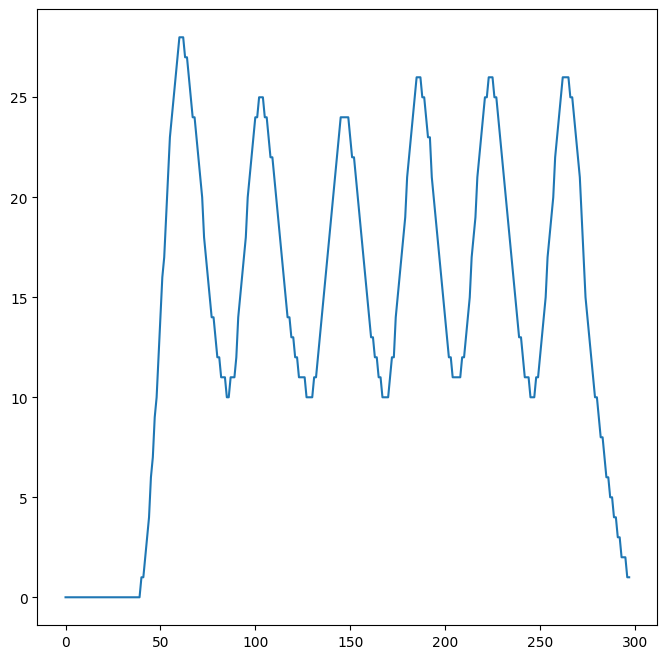

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot([i for i,v in enumerate(js['data'])], js['data'], label='x')
plt.show()
filtered_z = js["data"]

In [ ]:
import numpy as np
filter_kernel = np.ones(10) / 10
data = js["data"]
filtered_z = np.convolve(data,
                             filter_kernel,
                             'same')
print(filtered_z)

ValueError: x and y must have same first dimension, but have shapes (1060,) and (298,)

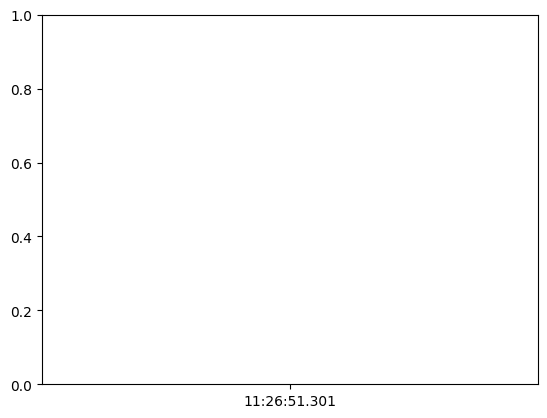

In [4]:
# plt.figure(figsize=(8, 8))
plt.plot(js['time'], filtered_z)
plt.show()

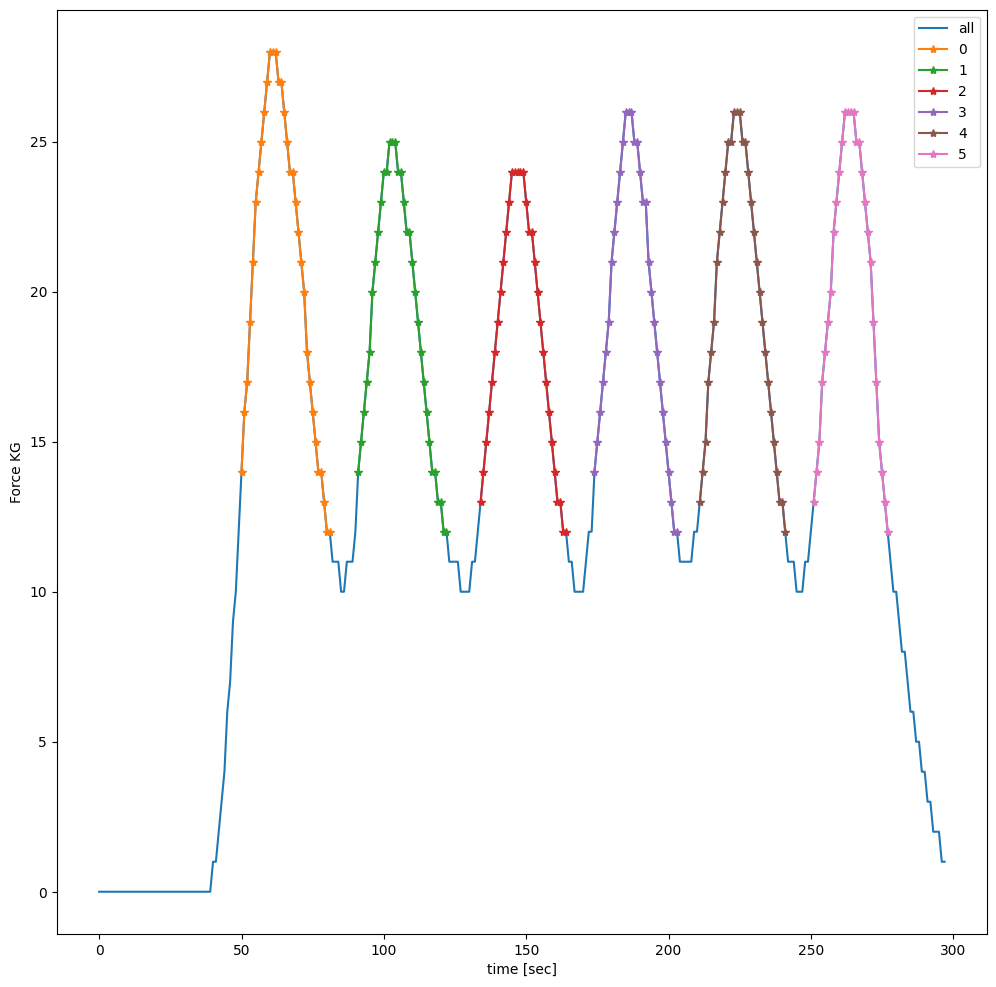

[ 61 103 147 186 224 263]


In [5]:
# Old Algorithm
from scipy.signal import find_peaks
def identify_reps(force_data):
    upward_thresh = 12.0
    z_acc = force_data

    # We want to the start and end location of every consecutive sequence of measurement above our threshold

    # Note: scipy.signal.find_peaks would accomplish this, but feel magical. So we do out ourselves.

    segment_start_locations = []
    segment_end_locations = []
    segment_started = False
    for index, acc_value in enumerate(z_acc):
        if acc_value > upward_thresh:
            # if this is the first time we're encountering a high accelreation, write down that we identify a new segment start:
            if not segment_started:
                segment_start_locations.append(index)
            segment_started = True

        if acc_value < upward_thresh:
            # if we're already inside a segment and observed a low acceleration, mark that the segment has ended
            if segment_started:
                segment_end_locations.append(index)
            segment_started = False
    # handle edge case: if the recording ends with high accleeration, we end the last segment segment
    if segment_started:
        segment_end_locations.append(index)

    return (segment_start_locations, segment_end_locations)

segment_starts, segment_ends = identify_reps(filtered_z)
t = [i for i,v in enumerate(js['data'])]
z = filtered_z
peaks2, nt = find_peaks(z, prominence=1)      # BEST!
# t = nt['left_bases']
plt.figure(figsize=(12, 12))
plt.plot(t, z, label='all')
i = 0
for start_loc,end_loc in zip(segment_starts, segment_ends):
    plt.plot(t[start_loc:end_loc], z[start_loc:end_loc], label=str(i), marker='*')
    i+=1
plt.xlabel('time [sec]')
plt.ylabel('Force KG')
plt.legend()
plt.show()
print(peaks2)

In [ ]:
# New Algorithm Based on Range

def is_more_than_threshold(segment_highest_peak, acc_value, is_min_threshold):
    percentage = 20
    value = segment_highest_peak - ((segment_highest_peak) * percentage/100)
    print(segment_highest_peak)
    print(value)
    if segment_highest_peak > acc_value:
         if not is_min_threshold:
            return acc_value > value
         return False
    else:
        return True

def identify_reps(force_data, min_upward_thresh):
    upward_thresh = min_upward_thresh
    z_acc = force_data

    # We want to the start and end location of every consecutive sequence of measurement above our threshold

    # Note: scipy.signal.find_peaks would accomplish this, but feel magical. So we do out ourselves.
    segment_start_locations = []
    segment_end_locations = []
    segment_highest_peak = upward_thresh
    segment_array = []
    segment_started = False

    for index, acc_value in enumerate(z_acc):
          print(segment_started)
#         if acc_value > upward_thresh:
          if is_more_than_threshold(segment_highest_peak, acc_value, segment_highest_peak==upward_thresh):
            # if this is the first time we're encountering a high accelreation, write down that we identify a new segment start:
            if not segment_started:
                segment_start_locations.append(index)
            segment_started = True
            segment_array.append(acc_value)

#         if acc_value < upward_thresh:
          if not is_more_than_threshold(segment_highest_peak, acc_value, segment_highest_peak==upward_thresh):
            # if we're already inside a segment and observed a low acceleration, mark that the segment has ended
            if segment_started:
                segment_end_locations.append(index)
                segment_highest_peak = max(segment_array)
                segment_array = []
            segment_started = False
    # handle edge case: if the recording ends with high accleeration, we end the last segment segment
    if segment_started:
        segment_end_locations.append(index)

    i = 0
    for start_loc,end_loc in zip(segment_start_locations, segment_end_locations):
        plt.plot(t[start_loc:end_loc], z[start_loc:end_loc], label=str(i), marker='*')
        i+=1
    # return i
    return (segment_start_locations, segment_end_locations)

segment_starts, segment_ends = identify_reps(filtered_z, 12)
t = [i for i,v in enumerate(js['data'])]
z = filtered_z
# peaks2, t = find_peaks(z, prominence=1)      # BEST!
plt.figure(figsize=(12, 12))
plt.plot(t, z, label='all')
i = 0
for start_loc,end_loc in zip(segment_starts, segment_ends):
    plt.plot(t[start_loc:end_loc], z[start_loc:end_loc], label=str(i), marker='*')
    i+=1
plt.xlabel('time [sec]')
plt.ylabel('Force KG')
plt.legend()
plt.show()


In [ ]:
# Calculation based on peaks and trough
import numpy as np
test = np.array(z)
peaks2, nt = find_peaks(test, prominence=1)
bottom, tn = find_peaks(-test, prominence=1)
print(peaks2)
print(nt)
plt.figure(figsize=(12, 12))
plt.plot(test)
plt.plot(peaks2,test[peaks2], label='x')
plt.plot(bottom, test[bottom], label='y')
plt.show()

In [8]:
def identify_reps(force_data, min_upward_thresh):
      top = np.array(force_data)
      peaks, pt = find_peaks(top, prominence=1)
      bottoms, bt = find_peaks(-top, prominence=1)
      i = 0
      rep = 0
      while 1:
         try:
            peak_data = peaks[i]
            bt_data = bottoms[i]
            rep+=1
            i+=1
         except IndexError as e:
            break
      return rep